
# Week 1 Project — From Raw Text to Features
**Goal:** Apply tokenisation, stopword removal, lemmatization, Bag of Words, and TF‑IDF on a corpus of your choice, then compare results and reflect.


## Setup (Run this)


In [ ]:

# Install & imports (safe for Colab)
!pip -q install nltk==3.9.1 scikit-learn==1.5.2 wordcloud==1.9.3

import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('gutenberg', quiet=True)
nltk.download('brown', quiet=True)
nltk.download('reuters', quiet=True)
nltk.download('movie_reviews', quiet=True)

import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg, brown, reuters, movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



## 1) Choose / Load Your Corpus
Pick **one** option below. You can also replace texts with your own.


In [3]:

# === OPTION A: Use an NLTK corpus (UNCOMMENT exactly one) ===
docs = [" ".join(brown.words(categories='news'))[:20000]]
# docs = [" ".join(reuters.words(fileid)) for fileid in reuters.fileids()[:10]]
# docs = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()[:10]]
# docs = [gutenberg.raw('austen-emma.txt')[:50000]]

# === OPTION B: Paste your own documents (default placeholder) ===
# docs = [
#     "Paste or load your first document here. You can replace these strings with text from news, blogs, or your own writing.",
#     "Add a second document here to compare TF‑IDF across multiple docs (recommended)."
# ]

print(f"Loaded {len(docs)} document(s). Example preview:\n", docs[0][:300])


Loaded 1 document(s). Example preview:
 The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves th



## 2) Preprocessing — **TODO: implement your pipeline**
Tokenise → lowercase → remove stopwords → lemmatize (and optionally compare stemming).


In [13]:
# === TODO 1: Build your preprocessing function ===
# Hints:
# - tokens = word_tokenize(text)
# - tokens = [t.lower() for t in tokens if t.isalpha()]
# - remove stopwords via nltk.corpus.stopwords
# - lemmatize with WordNetLemmatizer()
# (Optional) Compare with PorterStemmer()

from typing import List

def my_preprocess(text: str, remove_stop: bool = True, lemmatize: bool = True) -> str:
    tokens = word_tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    if remove_stop:
        stop_words = set(stopwords.words("english"))
        tokens = [t for t in tokens if t not in stop_words]
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    else:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

    # (Optional) try stemming:

    

docs_clean = [my_preprocess(d, lemmatize=True) for d in docs]
len(docs_clean), docs_clean[0][:200]

(1,
 'fulton county grand jury said friday investigation atlanta recent primary election produced evidence irregularity took place jury said presentment city executive committee charge election deserves pra')

###  Quick Word Cloud

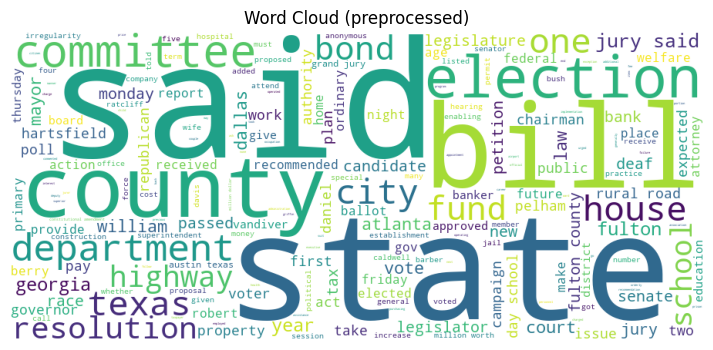

In [14]:

try:
    wc = WordCloud(width=900, height=400, background_color="white").generate(" ".join(docs_clean))
    plt.figure(figsize=(10,4))
    plt.imshow(wc); plt.axis("off")
    plt.title("Word Cloud (preprocessed)")
    plt.show()
except Exception as e:
    print("WordCloud skipped:", e)


## 3) Bag of Words — **TODO** build and inspect top words

In [ ]:

# === TODO 2: Create a Bag of Words vectorizer and fit ===
# Hint: CountVectorizer(max_features=2000, ngram_range=(1,1))
bow_vec = CountVectorizer(max_features=2000, ngram_range=(1,1))
X_bow = bow_vec.fit_transform(docs_clean)
# get the 10 top rated terms and their counts
bow_sum = np.array(X_bow.sum(axis=0)).flatten()
bow_indices = np.argsort(bow_sum)[-10:][::-1]
top_terms = []
top_counts = []
print("Top 10 Bag of Words terms:")
for idx in bow_indices:
    top_terms.append(bow_vec.get_feature_names_out()[idx])
    top_counts.append(bow_sum[idx])
    print(f"  {bow_vec.get_feature_names_out()[idx]}: {bow_sum[idx]}")




Top 10 Bag of Words terms:
  said: 33
  would: 29
  county: 22
  state: 20
  jury: 19
  bill: 17
  texas: 15
  election: 15
  school: 14
  fulton: 14


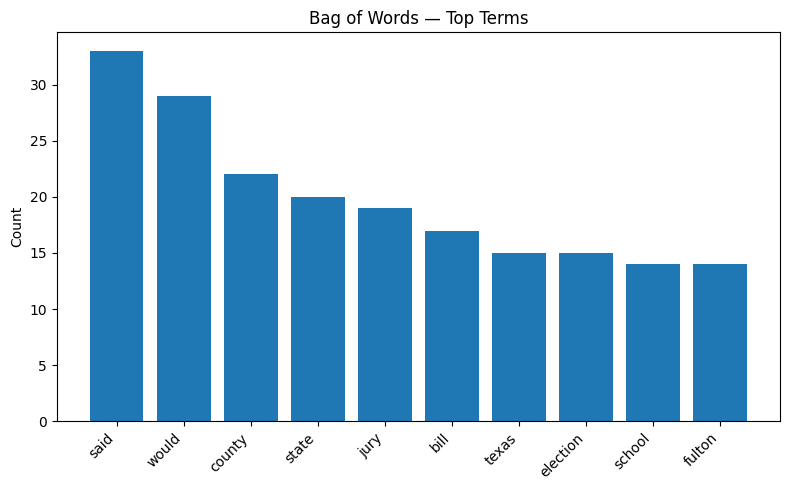

In [17]:

# Plot top BoW terms
plt.figure(figsize=(8,5))
plt.bar(top_terms, top_counts)
plt.title("Bag of Words — Top Terms")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 4) TF‑IDF — **TODO** build and inspect top weighted words

In [ ]:

# === TODO 3: Create a TF-IDF vectorizer and fit ===
# Hint: TfidfVectorizer(max_features=2000, ngram_range=(1,1))
# tfidf_vec = ...
# X_tfidf = ...




In [ ]:

# Plot top TF‑IDF terms
plt.figure(figsize=(8,5))
plt.bar(top_terms_t, top_scores_t)
plt.title("TF‑IDF — Top Weighted Terms")
plt.xticks(rotation=45, ha="right")
plt.ylabel("TF‑IDF score")
plt.tight_layout()
plt.show()



## Submission Checklist
- [ ] Notebook runs end-to-end  
- [ ] Preprocessing function implemented by you  
- [ ] BoW top terms + plot  
- [ ] TF‑IDF top terms + plot  
